# Question 7: Object Detection
- Let's build an object detection model to recognize the class and location of objects from image file, movie file and camera.

### Brief
The model 'can_bottle_objDetection' is built in order to classify beverage can and bottle (glass, plastic)

## 1. Mounting GGL Drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
%cd '/mydrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection'

/content/gdrive/My Drive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection


## 2. Setup

In [ ]:
# clone darknet
# !git clone https://github.com/AlexeyAB/darknet

In [ ]:
#  %cd /mydrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/darknet/data
#  !find -maxdepth 1 -type f -exec rm -rf {} \;

In [ ]:
# %cd /mydrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/darknet 
# %rm -rf cfg/
# %mkdir cfg

In [ ]:
# # Cập nhật Makelife
# %cd /mydrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/darknet 
# !sed -i 's/OPENCV=0/OPENCV=1/' Makefile
# !sed -i 's/GPU=0/GPU=1/' Makefile
# !sed -i 's/CUDNN=0/CUDNN=1/' Makefile
# !sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile 
# !sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [ ]:
# Gán quyền cho thư mục darknet
!chmod 755 -R /mydrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/darknet

In [ ]:
# Build tập tin darknet => Nhớ cấu hình Makefile trước khi !make
# !make 

In [ ]:
# %ls

In [ ]:
# !unzip /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/data/obj.zip -d /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/darknet/data

In [ ]:
%cd /mydrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/darknet

/content/gdrive/My Drive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/darknet


In [ ]:
# Phát sinh ra 2 tập tin train.txt và test.txt
# !python process.py

In [ ]:
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

## 3. Train data

In [ ]:
#Training
# !./darknet detector train data/obj.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

In [ ]:
# Chạy tiếp nếu hết session 
# !./darknet detector train data/obj.data cfg/yolov4-custom.cfg /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/training/yolov4-custom_last.weights -dont_show -map

## 4. Predictions
- images
- movie files
- camera

### 4.1 Images

In [ ]:
import cv2
import matplotlib.pyplot as plt 
%matplotlib inline

def imgShow(path):
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC) 
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
# imgShow('chart.png')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/training/yolov4-custom_best.weights /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/images/predict4.jpg -thresh 0.3 -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF

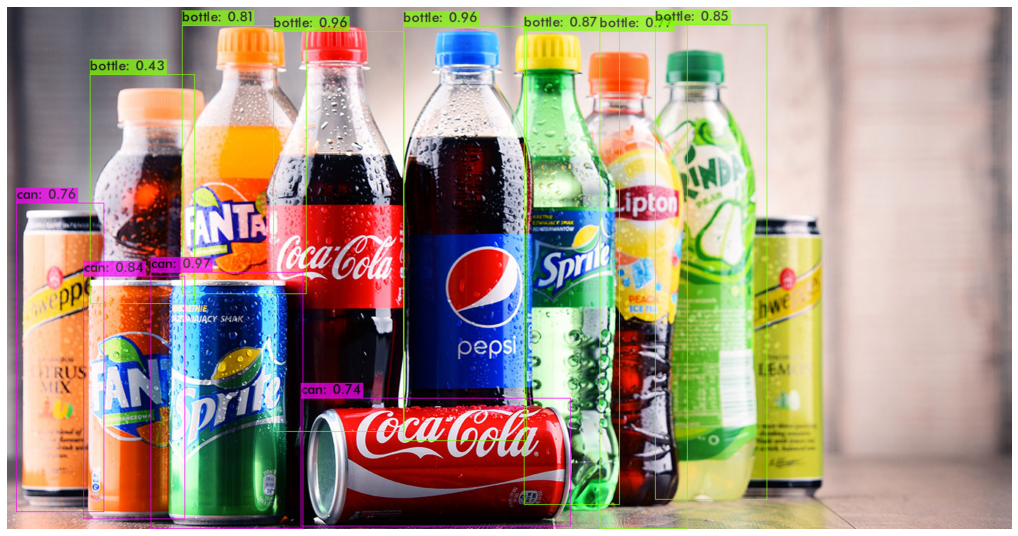

In [ ]:
imgShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/training/yolov4-custom_best.weights /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/images/predict5.jpg -thresh 0.3 -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF

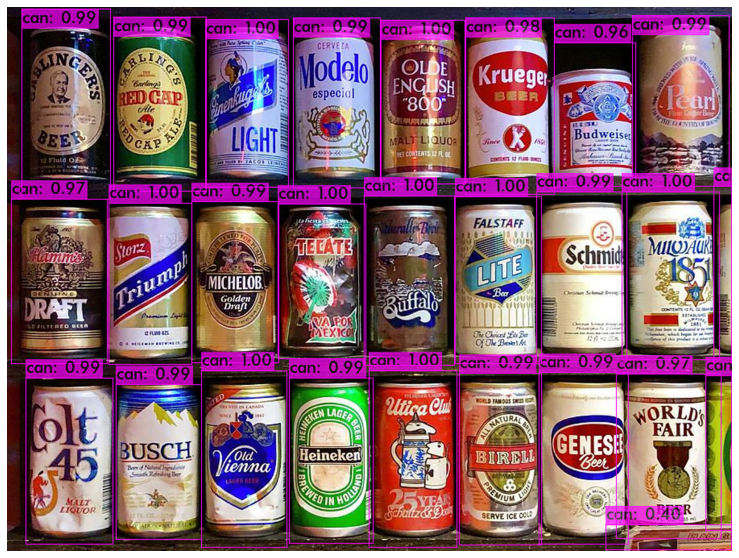

In [ ]:
imgShow('predictions.jpg')

### 4.2 Movie files

In [ ]:
# Video
# !./darknet detector demo data/obj.data cfg/yolov4-custom.cfg /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/training/yolov4-custom_best.weights -dont_show /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/videos/video1.mp4 -thresh 0.5 -i 0 -out_filename /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/videos/video1_new.mp4

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.0

In [ ]:
# Video
# !./darknet detector demo data/obj.data cfg/yolov4-custom.cfg /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/training/yolov4-custom_best.weights -dont_show /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/videos/video2.mp4 -thresh 0.5 -i 0 -out_filename /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/videos/video2_new.mp4

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.0

In [ ]:
# Video
# !./darknet detector demo data/obj.data cfg/yolov4-custom.cfg /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/training/yolov4-custom_best.weights -dont_show /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/videos/video3.mp4 -thresh 0.5 -i 0 -out_filename /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/videos/video3_new.mp4

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.0

In [ ]:
# Video
# !./darknet detector demo data/obj.data cfg/yolov4-custom.cfg /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/training/yolov4-custom_best.weights -dont_show /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/videos/IMG_5725.MOV -thresh 0.5 -i 0 -out_filename /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/videos/IMG_5725_new.mp4

Streaming output truncated to the last 5000 lines.
can: 90% 
can: 75% 

FPS:14.9 	 AVG_FPS:13.9

 cvWriteFrame 
Objects:

bottle: 66% 
bottle: 56% 
can: 98% 
can: 97% 
can: 97% 
can: 96% 
can: 95% 
can: 95% 
can: 94% 
can: 93% 
can: 91% 
can: 75% 

FPS:14.9 	 AVG_FPS:13.9

 cvWriteFrame 
Objects:

bottle: 71% 
bottle: 66% 
bottle: 55% 
can: 97% 
can: 97% 
can: 96% 
can: 96% 
can: 96% 
can: 95% 
can: 94% 
can: 93% 
can: 92% 
can: 79% 

FPS:15.2 	 AVG_FPS:13.9

 cvWriteFrame 
Objects:

bottle: 68% 
bottle: 66% 
can: 98% 
can: 98% 
can: 97% 
can: 97% 
can: 96% 
can: 96% 
can: 95% 
can: 93% 
can: 92% 
can: 77% 

FPS:15.0 	 AVG_FPS:13.9

 cvWriteFrame 
Objects:

bottle: 69% 
bottle: 61% 
can: 98% 
can: 98% 
can: 98% 
can: 97% 
can: 97% 
can: 96% 
can: 95% 
can: 92% 
can: 92% 
can: 82% 

FPS:15.0 	 AVG_FPS:13.9

 cvWriteFrame 
Objects:

bottle: 65% 
bottle: 59% 
bottle: 51% 
can: 98% 
can: 98% 
can: 98% 
can: 98% 
can: 97% 
can: 96% 
can: 95% 
can: 93% 
can: 90% 
can: 80% 

FPS:15.1 	 AVG_FP

In [ ]:
# Video
# !./darknet detector demo data/obj.data cfg/yolov4-custom.cfg /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/training/yolov4-custom_best.weights -dont_show /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/videos/IMG_5727.mp4 -thresh 0.5 -i 0 -out_filename /content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/videos/IMG_5727_new.mp4

Streaming output truncated to the last 5000 lines.
bottle: 77% 
bottle: 76% 
bottle: 74% 
bottle: 67% 
bottle: 62% 
bottle: 59% 

FPS:21.3 	 AVG_FPS:17.9

 cvWriteFrame 
Objects:

bottle: 96% 
bottle: 94% 
bottle: 88% 
bottle: 82% 
bottle: 77% 
bottle: 76% 
bottle: 75% 
bottle: 63% 
bottle: 58% 
bottle: 55% 
bottle: 52% 

FPS:21.9 	 AVG_FPS:17.9

 cvWriteFrame 
Objects:

bottle: 97% 
bottle: 88% 
bottle: 88% 
bottle: 81% 
bottle: 80% 
bottle: 78% 
bottle: 76% 
bottle: 64% 
bottle: 63% 
bottle: 53% 

FPS:22.3 	 AVG_FPS:17.9

 cvWriteFrame 
Objects:

bottle: 97% 
bottle: 92% 
bottle: 87% 
bottle: 82% 
bottle: 81% 
bottle: 79% 
bottle: 76% 
bottle: 66% 
bottle: 60% 
bottle: 57% 

FPS:22.8 	 AVG_FPS:17.9

 cvWriteFrame 
Objects:

bottle: 97% 
bottle: 91% 
bottle: 87% 
bottle: 82% 
bottle: 82% 
bottle: 80% 
bottle: 77% 
bottle: 65% 
bottle: 63% 
bottle: 57% 

FPS:22.2 	 AVG_FPS:17.9

 cvWriteFrame 
Objects:

bottle: 97% 
bottle: 92% 
bottle: 88% 
bottle: 84% 
bottle: 82% 
bottle: 81% 
bottl

## 4.3 Camera

### ---Take photo and detect

In [ ]:
from IPython.display import display, Javascript, Image 
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
%matplotlib inline

In [ ]:
!pip install darknet

In [ ]:
### Hàm darknet_helper()
# import darknet functions to perform object detections 
from darknet import *

# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network(
"/content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/darknet/cfg/yolov4-custom.cfg", 
"/content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/darknet/data/obj.data", 
"/content/gdrive/MyDrive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question8_ObjDetection/training/yolov4-custom_best.weights")
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image 
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3) 
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  img_resized = cv2.resize(img_rgb, (width, height), interpolation=cv2.INTER_LINEAR)
  # get image ratios to convert bounding boxes to proper size 
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height
  # run model on darknet style image to get detections 
  copy_image_from_bytes(darknet_image, img_resized.tobytes()) 
  detections = detect_image(network, class_names, darknet_image) 
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

In [ ]:
# function to convert the JavaScript object into an OpenCV image 
def js_to_image(js_reply):
  """ 
  Params:
    js_reply: JavaScript object containing image from webcam 
  Returns:
    img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8) # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1) 
  return img

In [ ]:
# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
    bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
    bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf- 8')))
  return bbox_bytes

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8): 
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button'); 
      capture.textContent = 'Capture'; 
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div); 
      div.appendChild(video); 
      video.srcObject = stream;
      await video.play();
      // Resize the output to fit the video element. 
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
      const canvas = document.createElement('canvas'); 
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight; 
      canvas.getContext('2d').drawImage(video, 0, 0); 
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality); 
    }
    ''')  
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality)) 
  # get OpenCV format image
  img = js_to_image(data)
  # call our darknet helper on webcam image
  detections, width_ratio, height_ratio = darknet_helper(img, width, height)
  # loop through detections and draw them on webcam image 
  for label, confidence, bbox in detections:
    left, top, right, bottom = bbox2points(bbox)
    left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    cv2.rectangle(img, (left, top), (right, bottom), class_colors[label], 2) 
    cv2.putText(img, "{} [{:.2f}]".format(label, float(confidence)),
                  (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 
                  class_colors[label], 2)
  # save image 
  cv2.imwrite(filename, img)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


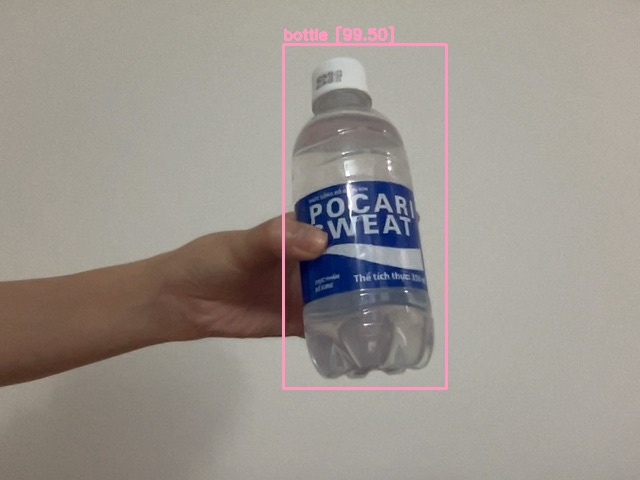

In [ ]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename)) # Show the image which was just taken. 
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not 
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg


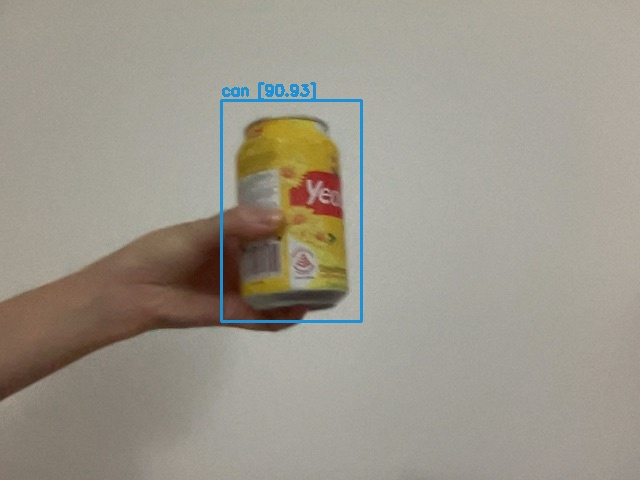

In [ ]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename)) # Show the image which was just taken. 
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not 
  # grant the page permission to access it.
  print(str(err))

### ---Real-time detection

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data 

<IPython.core.display.Javascript object>

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes  